<a href="https://colab.research.google.com/github/Zulfatinnafisah/Kumpulan-Tugas-Kampus-Merdeka/blob/main/Activity_3_K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Activity 3: K Means Clustering From Scratch Python

K-means (MacQueen, 1967) is one of the simplest unsupervised learning algorithms that solve the well known clustering problem. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters) fixed a priori. The main idea is to define k centroids, one for each cluster. These centroids shoud be placed in a cunning way because of different location causes different result. So, the better choice is to place them as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. When no point is pending, the first step is completed and an early groupage is done. At this point we need to re-calculate k new centroids as barycenters of the clusters resulting from the previous step. After we have these k new centroids, a new binding has to be done between the same data set points and the nearest new centroid. A loop has been generated. As a result of this loop we may notice that the k centroids change their location step by step until no more changes are done. In other words centroids do not move any more.
Finally, this algorithm aims at minimizing an objective function, in this case a squared error function. The objective function

$$J=\sum \limits_{j=1} ^{k} \sum \limits_{i=1} ^{n} \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} $$

where $ \begin{Vmatrix} x_{i} ^{(j)} - c_{j}\end{Vmatrix} ^{2} $ is a chosen distance measure between a data point $  x_{i} ^{(j)} $ and the cluster centre $c_{j}$, is an indicator of the distance of the n data points from their respective cluster centres.


## K-Means Clustering Algorithm

1.	Determine the parameter k
2.	Determine the initial cluster center randomly
3.	Calculate the distance of each data to the center of the cluster
4.	Assign data clusters based on the nearest cluster center
5.	Updating the cluster center by calculating the average value of each cluster
6.	Repeat steps 3-5 until the stop criteria are met:
    1.	Specific number of iterations reached, OR
    2.	No (or minimum) cluster member difference in the last two iterations, OR
    3.	No (or minimum) cluster center difference, OR
    4.	Minimum SSE(Sum of Squared Error) difference


![](http://shabal.in/visuals/kmeans/left.gif)

## K Means Example

**0. Dataset**

| $$x_1$$ | $$x_2$$ |
| :---: | :---: |
|   1   |   1   |
|   2   |   3   |
|   7   |   8   |
|   8   |   8   |

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.DataFrame({"x1":[1,2,7,8], "x2":[1,3,8,8]})
data

,x1,x2
0,1,1
1,2,3
2,7,8
3,8,8


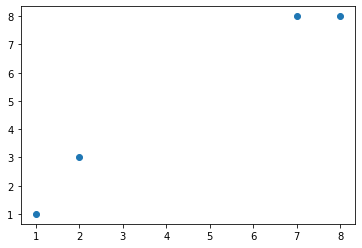

In [ ]:
plt.scatter(data.x1, data.x2)

**1. Determine the parameter $k$**

$$k=2$$

In [ ]:
k=2

**2. Determine the initial cluster center randomly**

|Centroid | $$x_1$$ | $$x_2$$ |
| :---:   | :---: | :---: |
| $$c_1$$ |   1   |   1   |
| $$c_2$$ |   2   |   3   |

In [ ]:
pusat_klaster = np.array([[1,1],[2,3]])
pusat_klaster

array([[1, 1],
       [2, 3]])

In [ ]:
# Determine the initial cluster center randomly
import random
def pusat_klaster_awal(k, data):
    X=np.array(data)
    n=len(X)
    list_1=np.arange(0,n)
    pusat_klaster_index = random.choices(list_1, k=k)
    pusat_klaster=X[pusat_klaster_index]
    return pusat_klaster

**3. Calculate the distance of each data to the center of the cluster**

In [ ]:
# Define the euclidean distance function
def jarak_euclidean(x,y):
    return np.sqrt(sum(pow(a-b, 2) for a, b in zip(x,y)))

In [ ]:
def jarak_centroid_euclidean(data,pusat_klaster):
    n=len(data)
    k=np.array(pusat_klaster).shape[0]
    jarak=[]
    for i in range(n):
        x = list(data.iloc[i,::])
        jrk = [jarak_euclidean(x, pusat_klaster[j]) for j in range(k)]
        jarak.append(jrk)
    return jarak

In [ ]:
jarak_centroid=jarak_centroid_euclidean(data,pusat_klaster)
jarak_centroid

[[0.0, 2.23606797749979],
 [2.23606797749979, 0.0],
 [9.219544457292887, 7.0710678118654755],
 [9.899494936611665, 7.810249675906654]]

**4. Assign data clusters based on the nearest cluster center**

In [ ]:
def menentukan_klaster(jarak_centroid):
    n=len(jarak_centroid)
    label_klaster=list()
    for i in range(n):
        max_val, idx = min((val, idx) for (idx, val) in enumerate(jarak_centroid[i]))
        label_klaster.append(idx)
    return label_klaster

In [ ]:
klaster=menentukan_klaster(jarak_centroid)
klaster

[0, 1, 1, 1]

**5. Updating the cluster center by calculating the average value of each cluster**

In [ ]:
def menghitung_pusat_klaster(data, klaster):
    data['label']=klaster
    pusat_barudf=data.groupby('label', as_index=False).mean()
    pusat_barudf=pusat_barudf.iloc[::,1:]
    pusat_klaster_baru=np.array(pusat_barudf)
    return pusat_klaster_baru

In [ ]:
pusat_klaster_baru=menghitung_pusat_klaster(data, klaster)
pusat_klaster_baru

array([[1.        , 1.        ],
       [5.66666667, 6.33333333]])

**6. Repeat steps 3-5 until the stop criteria are met:**

In [ ]:
def perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru):
    perubahan = 0
    for a,b in zip(pusat_klaster_lama, pusat_klaster_baru):
        perubahan+=jarak_euclidean(a,b)
    return perubahan

In [ ]:
perubahan_pusat_klaster_euclidean(pusat_klaster, pusat_klaster_baru)

4.955356249106169

## K Means Function

In [ ]:
def plot_klaster(X, klaster, pusat_klaster):
    df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=klaster))
    colors = {0:'blue', 1:'orange', 2:'green'}
    fig, ax = plt.subplots(figsize=(8, 8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    ax.scatter(pusat_klaster[:, 0], pusat_klaster[:, 1], marker='*', s=150, c='#ff2222')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.show()

In [ ]:
def k_means(k, df):
    X=np.array(df)
    pusat_klaster_lama = pusat_klaster_awal(k, X)
    klaster = [0]*len(X)
    epsilon = 100
    iterasi = -1
    while epsilon>.001:
        jarak_ke_pusat_klaster=jarak_centroid_euclidean(df,pusat_klaster_lama)
        klaster = menentukan_klaster(jarak_ke_pusat_klaster)
        plot_klaster(X, klaster, pusat_klaster_lama)
        pusat_klaster_baru = menghitung_pusat_klaster(df, klaster)
        epsilon = perubahan_pusat_klaster_euclidean(pusat_klaster_lama, pusat_klaster_baru)
        pusat_klaster_lama = pusat_klaster_baru
        iterasi += 1
    return iterasi, klaster, pusat_klaster_baru

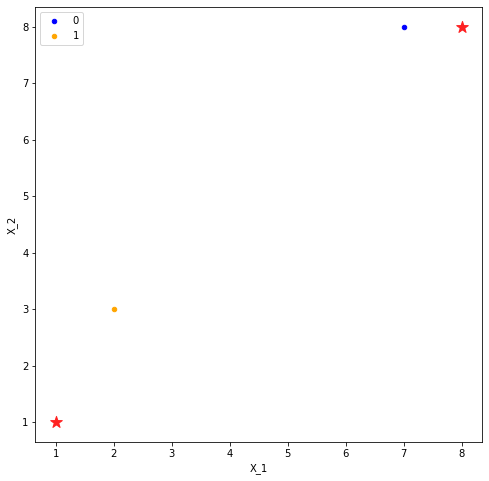

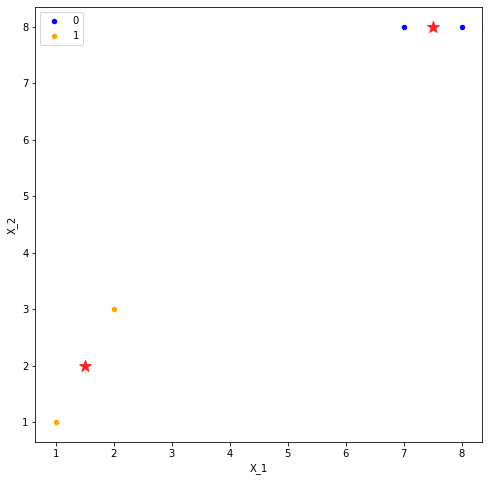

In [ ]:
iterasi, klaster, pusat_klaster= k_means(2, data)

## K-Means Clustering using Python Scikit Learn

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(data.iloc[:,:2])

In [ ]:
X

array([[1, 1],
       [2, 3],
       [7, 8],
       [8, 8]])

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=3).fit(X)

In [ ]:
kmeans.labels_

array([1, 1, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=3).fit(X)

In [ ]:
kmeans.labels_

array([1, 1, 0, 0], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
kmeans.labels_

array([0, 0, 1, 1], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[1.5, 2. ],
       [7.5, 8. ]])

## Live Exercise Coding Activity 3: K Means Clustering 

Given Dataset

In [ ]:
data=pd.DataFrame({"Customer ID":["001", "002", "003", "004", "005", "006"], 
                   "Annual Income":[1231, 1452, 789, 201, 78, 45], 
                   "Spending Score":[9, 8, 8, 2, 1, 6]})
data

,Customer ID,Annual Income,Spending Score
0,001,1231,9
1,002,1452,8
2,003,789,8
3,004,201,2
4,005,78,1
5,006,45,6


In [ ]:
# Name               :
# University         :
# Major              :
# Student Number     :

In [ ]:
# Cluster the dataset above using K Means clustering into 2 cluster.


[1 1 1 0 0 0]
